In [1]:
import numpy as np
from numpy.random import RandomState
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## toy problem

In [2]:
# reproducibility
r = RandomState(seed=42)

# simulating data
n_points = 1000
n_outliers = 100
df = pd.DataFrame(
    np.vstack([
        2+r.randn(n_outliers,2)*4,
        r.randn(n_points,2)
    ]), columns=['x1', 'x2']
)
df.head()

,x1,x2
0,3.986857,1.446943
1,4.590754,8.092119
2,1.063387,1.063452
3,8.316851,5.069739
4,0.122102,4.170240


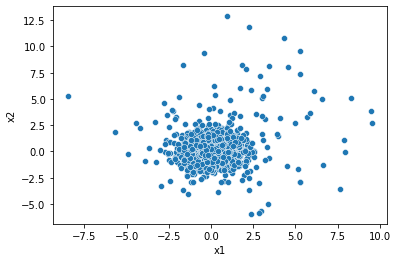

In [3]:
sns.scatterplot(x='x1', y='x2', data=df)
plt.show()

### Removing Outliers
#### Standard Deviation Method
<center>
<img src="https://miro.medium.com/max/3144/1*rV7rq7F_uB5gwjzzGJ9VqA.png" width="500">
</center>

In [4]:
from scipy import stats

outliers_zscore = df[np.abs(stats.zscore(df)) > 3]

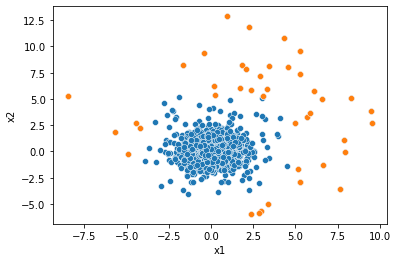

In [5]:
sns.scatterplot(x='x1', y='x2', data=df)
sns.scatterplot(x='x1', y='x2', data=outliers_zscore)
plt.show()

#### Interquartile Range Method

Quantiles
<center>
<img src="https://cdn.scribbr.com/wp-content/uploads/2020/09/iqr_quartiles.png" width="500">
</center>
Interquartile
<center>
<img src="https://naysan.ca/wp-content/uploads/2020/06/box_plot_ref_needed.png" width="500">
</center>



In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

x1    1.392266
x2    1.501116
dtype: float64

In [7]:
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

In [8]:
outliers_iqr = df[outliers.any(axis=1)]

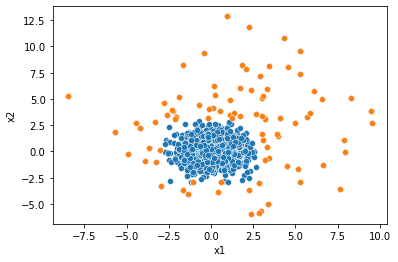

In [9]:
sns.scatterplot(x='x1', y='x2', data=df)
sns.scatterplot(x='x1', y='x2', data=outliers_iqr)
plt.show()